In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(r"C:\Users\gupta\Downloads\AI_Resume_Screening.csv")
df

,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,2,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,3,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,4,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,5,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100
...,...,...,...,...,...,...,...,...,...,...,...
995,996,Brenda Williams,"Cybersecurity, Linux, Ethical Hacking",0,B.Sc,NaN,Cybersecurity Analyst,Reject,114364,9,60
996,997,Colleen Hicks,"Deep Learning, Machine Learning",0,MBA,Deep Learning Specialization,Data Scientist,Reject,103294,5,45
997,998,Michelle Molina,"TensorFlow, NLP",0,B.Tech,Google ML,AI Researcher,Hire,113855,9,65
998,999,Danielle Horn,"Linux, Networking, Cybersecurity, Ethical Hacking",8,PhD,AWS Certified,Cybersecurity Analyst,Hire,83146,10,100


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df = df.drop('Resume_ID', axis=1)

In [5]:
df.head()

,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,NaN,AI Researcher,Hire,104895,8,100
1,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100
2,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70
3,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95
4,Julie Hill,"SQL, React, Java",4,PhD,NaN,Software Engineer,Hire,87441,9,100


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()/df.shape[0]*100

Name                       0.0
Skills                     0.0
Experience (Years)         0.0
Education                  0.0
Certifications            27.4
Job Role                   0.0
Recruiter Decision         0.0
Salary Expectation ($)     0.0
Projects Count             0.0
AI Score (0-100)           0.0
dtype: float64

-Numerical- Salary Expectation ($)
-Categorical- Name, Skill(/), Experience (Years), Education, Certifications, Job Role, Recruiter Decision, Projects Count, AI Score (0-100)

In [9]:
#Univariate Analysis (Numerical Column)
#Salary Expectation
df['Salary Expectation ($)'].describe()

count      1000.000000
mean      79994.486000
std       23048.472549
min       40085.000000
25%       60415.750000
50%       79834.500000
75%       99583.250000
max      119901.000000
Name: Salary Expectation ($), dtype: float64

<Axes: ylabel='Frequency'>

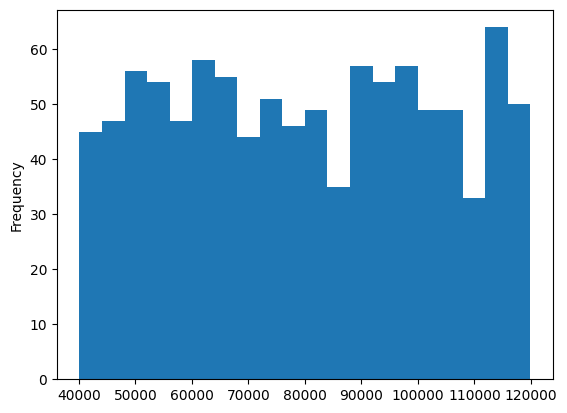

In [10]:
df['Salary Expectation ($)'].plot(kind = 'hist', bins = 20)

<Axes: ylabel='Density'>

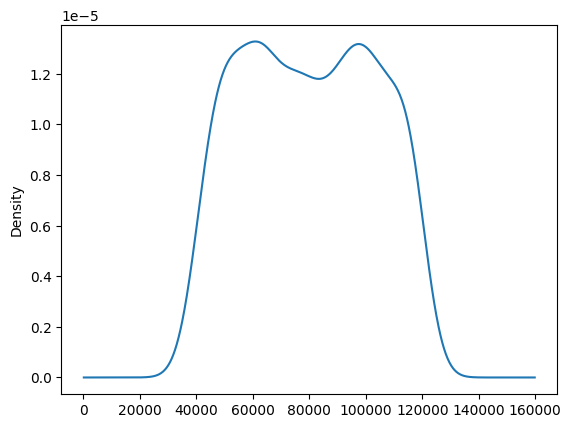

In [11]:
df['Salary Expectation ($)'].plot(kind = 'kde')

<Axes: >

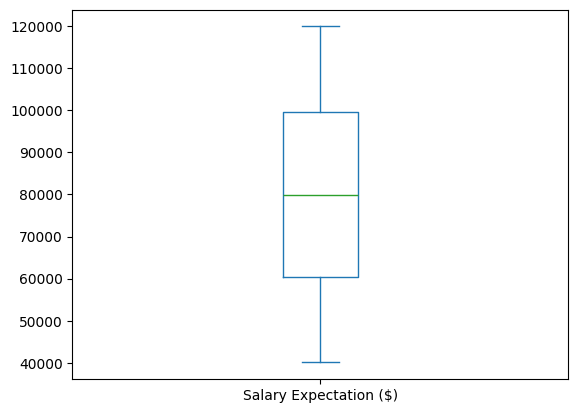

In [12]:
df['Salary Expectation ($)'].plot(kind = 'box')

In [13]:
df['Salary Expectation ($)'].skew()

0.016316758667752326

In [14]:
# Managing NaN in the certificate column
df['Certifications'].fillna('No Certification', inplace=True)

In [15]:
# Managing Skills Column
df['Skills_List'] = df['Skills'].str.split(', ')
# Expand the Skills_List into separate rows
df_exploded = df.explode('Skills_List')
df['NumOfSkill'] = df['Skills_List'].apply(len)
df

,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Skills_List,NumOfSkill
0,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,No Certification,AI Researcher,Hire,104895,8,100,"[TensorFlow, NLP, Pytorch]",3
1,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100,"[Deep Learning, Machine Learning, Python, SQL]",4
2,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70,"[Ethical Hacking, Cybersecurity, Linux]",3
3,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95,"[Python, Pytorch, TensorFlow]",3
4,Julie Hill,"SQL, React, Java",4,PhD,No Certification,Software Engineer,Hire,87441,9,100,"[SQL, React, Java]",3
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Brenda Williams,"Cybersecurity, Linux, Ethical Hacking",0,B.Sc,No Certification,Cybersecurity Analyst,Reject,114364,9,60,"[Cybersecurity, Linux, Ethical Hacking]",3
996,Colleen Hicks,"Deep Learning, Machine Learning",0,MBA,Deep Learning Specialization,Data Scientist,Reject,103294,5,45,"[Deep Learning, Machine Learning]",2
997,Michelle Molina,"TensorFlow, NLP",0,B.Tech,Google ML,AI Researcher,Hire,113855,9,65,"[TensorFlow, NLP]",2
998,Danielle Horn,"Linux, Networking, Cybersecurity, Ethical Hacking",8,PhD,AWS Certified,Cybersecurity Analyst,Hire,83146,10,100,"[Linux, Networking, Cybersecurity, Ethical Hac...",4


In [16]:
# Univariate Analysis (Categorical Columns)
#-Categorical- Name, Skill(/), Experience (Years), Education, Certifications, Job Role, Recruiter Decision, Projects Count, AI Score (0-100)
print(df['Skills'].value_counts())
print(" ")
print(" ")
print(df['Experience (Years)'].value_counts())
print(" ")
print(" ")
print(df['Education'].value_counts())
print(" ")
print(" ")
print(df['Certifications'].value_counts())
print(" ")
print(" ")
print(df['Job Role'].value_counts())
print(" ")
print(" ")
print(df['Recruiter Decision'].value_counts())
print(" ")
print(" ")
print(df['Projects Count'].value_counts())
print(" ")
print(" ")
print(df['AI Score (0-100)'].value_counts())
print(" ")
print(" ")
print(df['NumOfSkill'].value_counts())

Skills
Ethical Hacking, Networking                          11
SQL, Java                                            11
Python, Machine Learning                             11
SQL, Machine Learning                                10
Ethical Hacking, Linux                               10
                                                     ..
Cybersecurity, Linux, Networking                      1
Linux, Cybersecurity, Ethical Hacking, Networking     1
NLP, Python, Pytorch                                  1
SQL, React, Java, C++                                 1
NLP, Pytorch, TensorFlow, Python                      1
Name: count, Length: 238, dtype: int64
 
 
Experience (Years)
3     106
1     102
6      99
5      95
7      93
8      91
0      89
9      86
2      82
4      80
10     77
Name: count, dtype: int64
 
 
Education
B.Sc      205
MBA       202
B.Tech    200
M.Tech    198
PhD       195
Name: count, dtype: int64
 
 
Certifications
No Certification                274
Deep Learning 

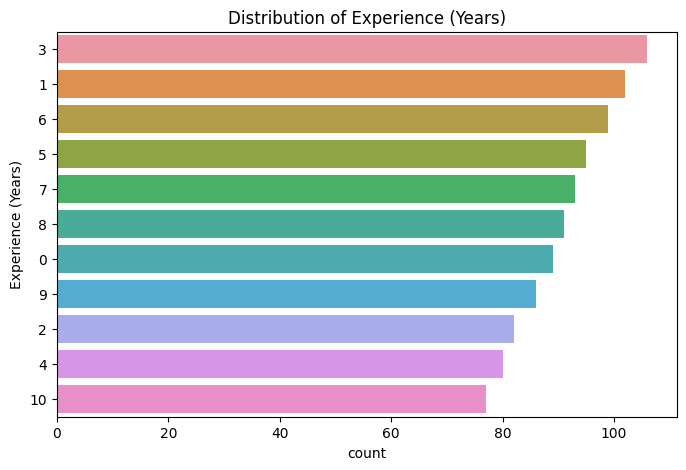

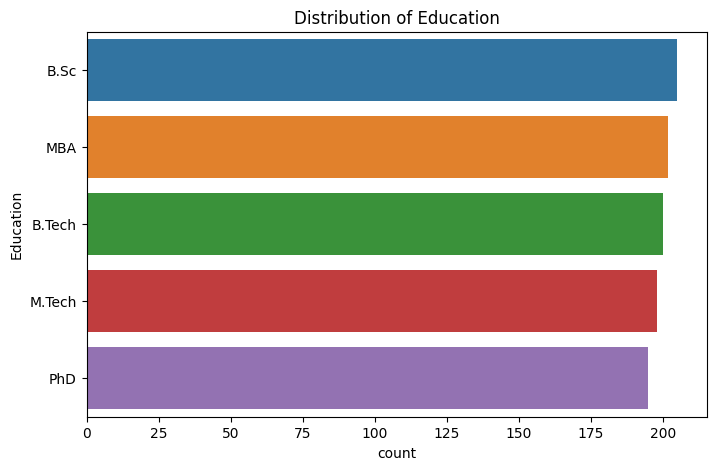

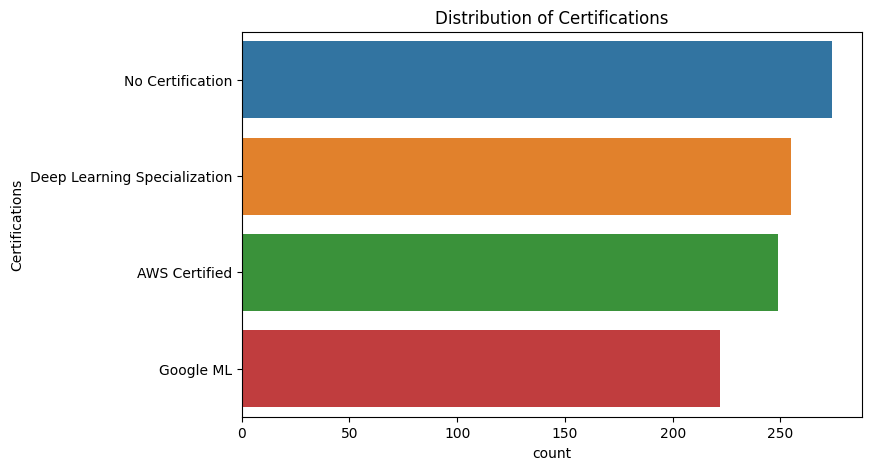

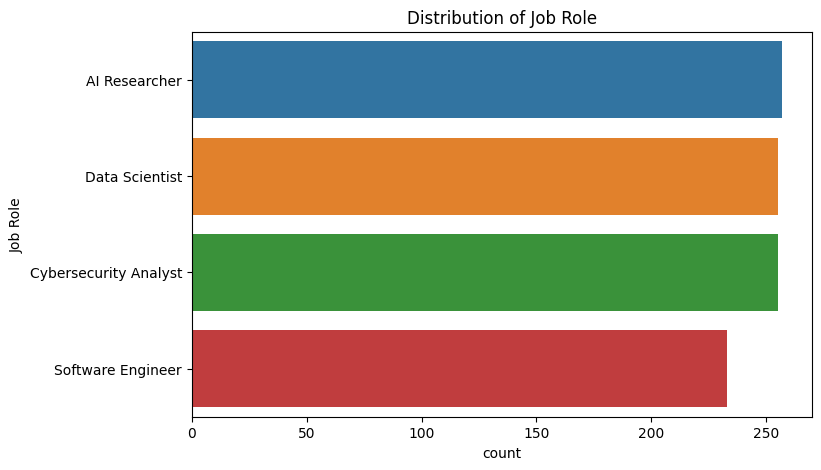

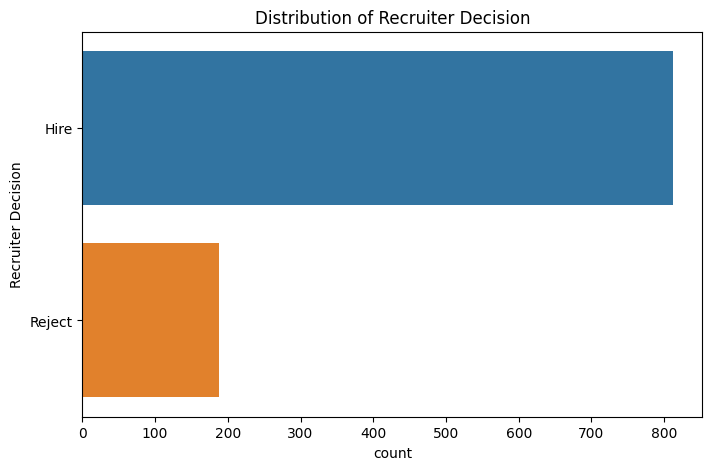

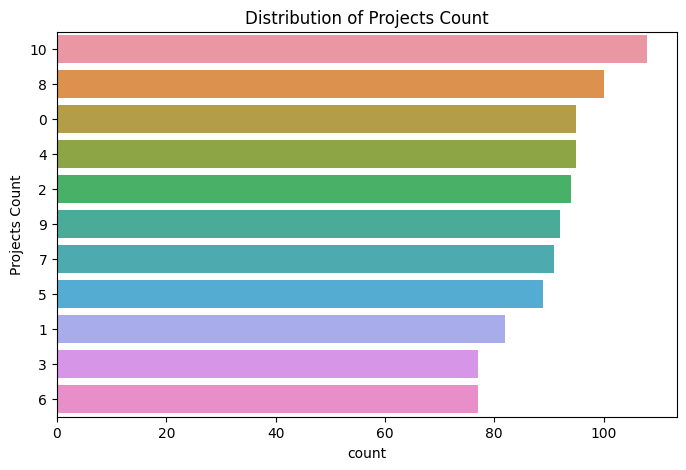

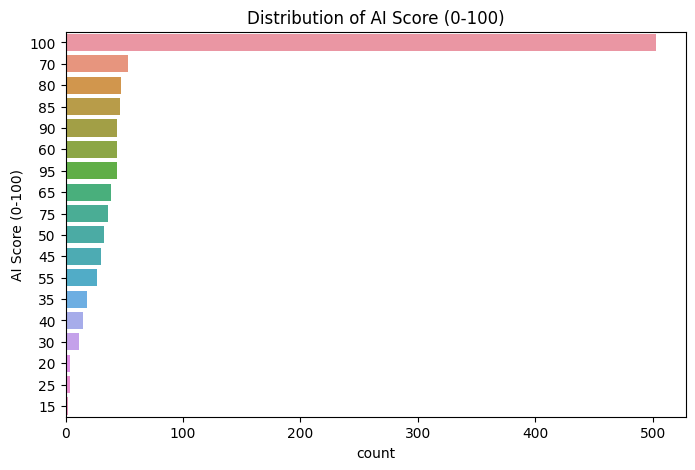

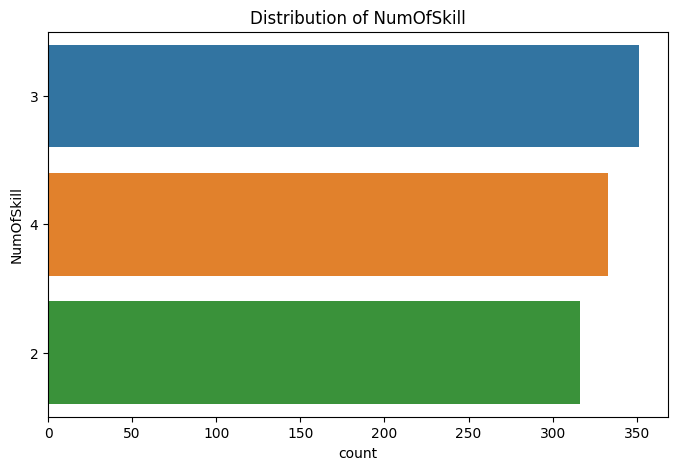

In [17]:
# Function to plot categorical columns
def plot_categorical(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(order=df[col].value_counts().index, y=df[col])
        plt.title(f"Distribution of {col}")
        plt.show()

# Identify categorical columns
categorical_cols = ['Experience (Years)', 'Education', 'Certifications', 'Job Role', 'Recruiter Decision', 'Projects Count', 'AI Score (0-100)','NumOfSkill' ]

# Plot them
plot_categorical(df, categorical_cols)


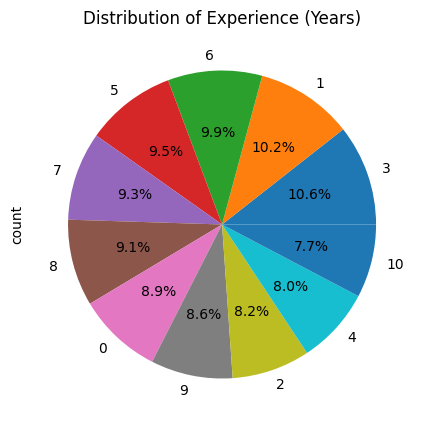

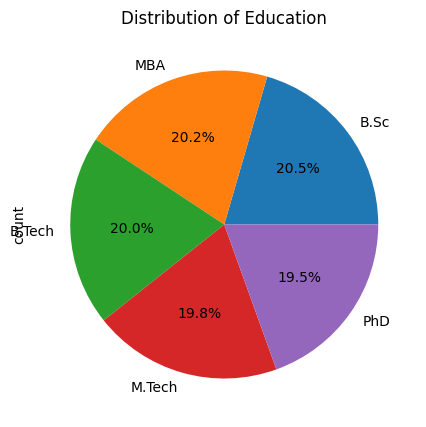

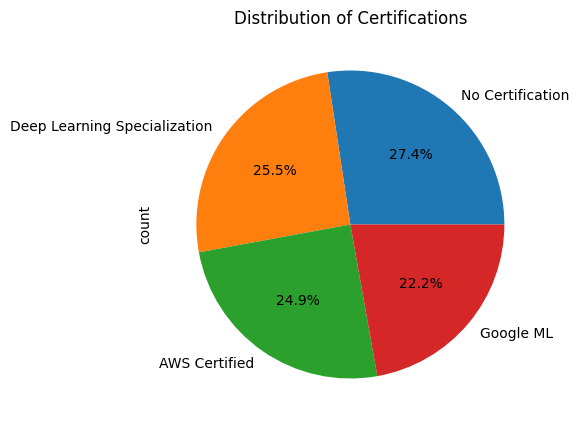

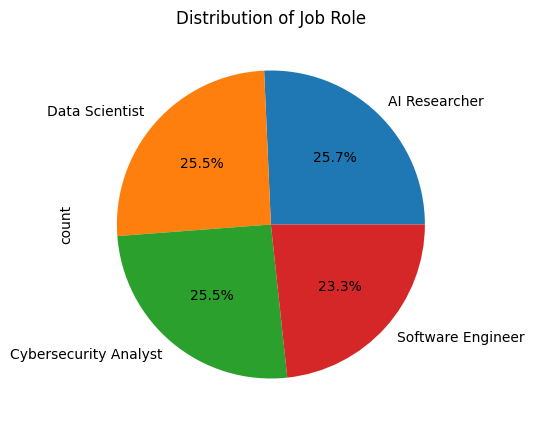

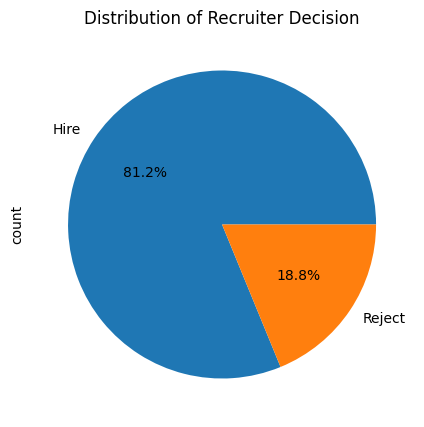

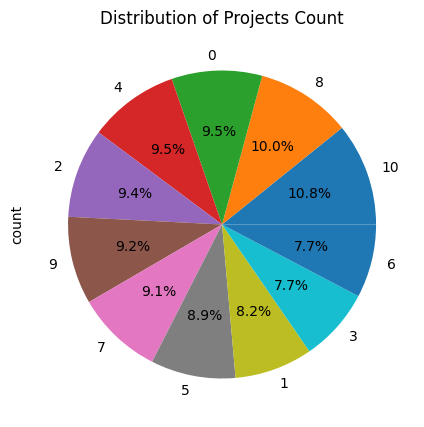

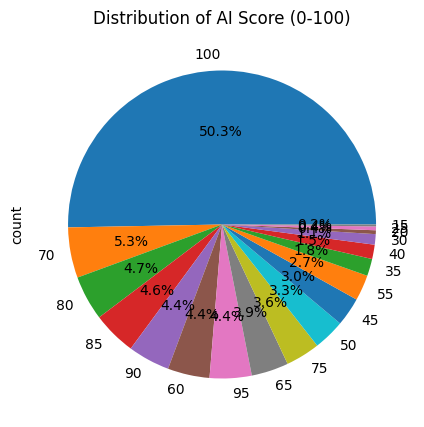

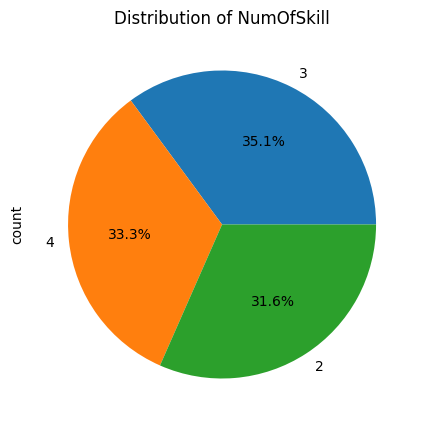

In [18]:
def plot_categorical(df, columns):
    for col in columns:
        plt.figure(figsize=(8, 5))
        df[col].value_counts().plot.pie(autopct='%1.1f%%')
        plt.title(f"Distribution of {col}")
        plt.show()

plot_categorical(df, categorical_cols)

In [19]:
#Bivariate Analysis


*Role Vs Recruiter Decision*
 
Recruiter Decision     Hire  Reject   All
Job Role                                 
AI Researcher           210      47   257
Cybersecurity Analyst   202      53   255
Data Scientist          205      50   255
Software Engineer       195      38   233
All                     812     188  1000
 
 


<Axes: xlabel='Job Role'>

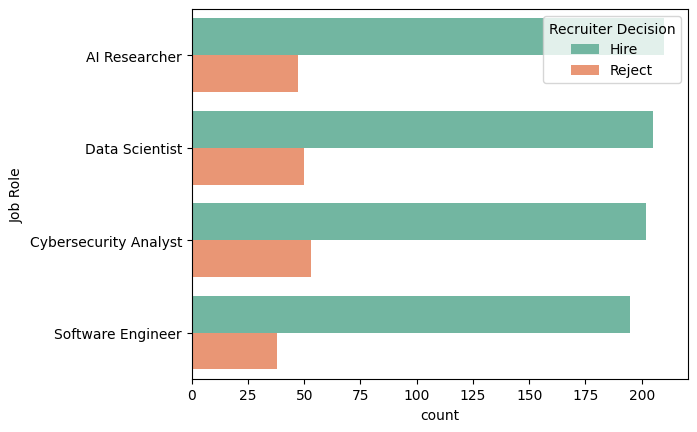

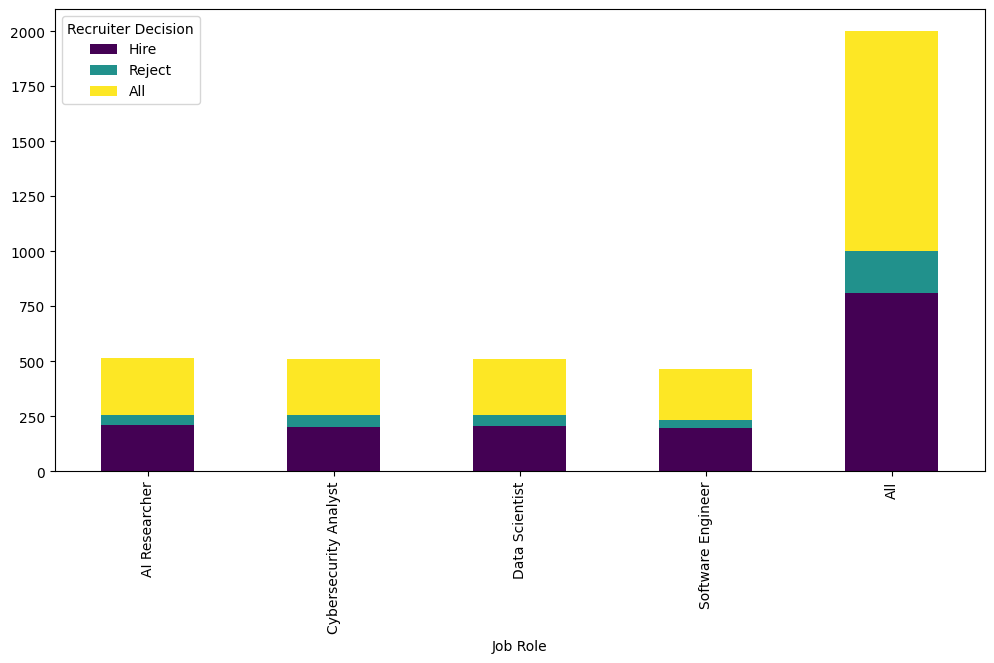

In [20]:
print("*Role Vs Recruiter Decision*")
print(" ")
RoleVsRecDecision = pd.crosstab(df['Job Role'], df['Recruiter Decision'], margins=True)
print(RoleVsRecDecision)
print(" ")
print(" ")
sns.countplot(y='Job Role', hue='Recruiter Decision', data=df, palette='Set2')
RoleVsRecDecision.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')


In [21]:
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['Job Role'], df['Recruiter Decision']))

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 1.7579621838691484
P-value: 0.6241252746010506


In [22]:
df_exploded = df.explode('Skills_List')
print("*Skills_List Vs Recruiter Decision*\n")

# Crosstab between Skills and Recruiter Decision
Skills_ListVsRecDecision = pd.crosstab(df_exploded['Skills_List'], df_exploded['Recruiter Decision'], margins=True)
Skills_ListVsRecDecision['Hire_Percentage'] = (Skills_ListVsRecDecision['Hire'] / Skills_ListVsRecDecision['All']) * 100
print(Skills_ListVsRecDecision)





*Skills_List Vs Recruiter Decision*

Recruiter Decision  Hire  Reject   All  Hire_Percentage
Skills_List                                            
C++                  141      27   168        83.928571
Cybersecurity        147      37   184        79.891304
Deep Learning        148      36   184        80.434783
Ethical Hacking      170      36   206        82.524272
Java                 156      32   188        82.978723
Linux                157      34   191        82.198953
Machine Learning     158      42   200        79.000000
NLP                  163      32   195        83.589744
Networking           146      38   184        79.347826
Python               318      70   388        81.958763
Pytorch              155      34   189        82.010582
React                141      24   165        85.454545
SQL                  305      65   370        82.432432
TensorFlow           172      33   205        83.902439
All                 2477     540  3017        82.101425


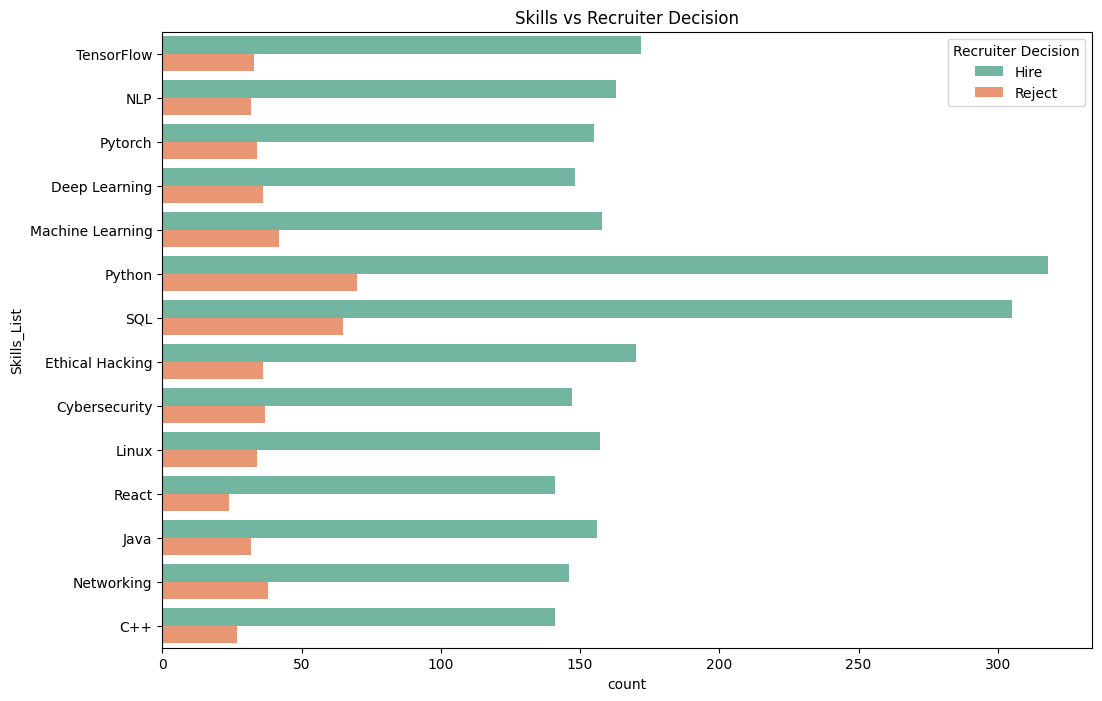

In [23]:
# Countplot of Skills vs Recruiter Decision
plt.figure(figsize=(12, 8))
sns.countplot(y='Skills_List', hue='Recruiter Decision', data=df_exploded, palette='Set2')
plt.title("Skills vs Recruiter Decision")
plt.show()

In [24]:
df_exploded = df.explode('Skills_List')
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df_exploded['Skills_List'], df_exploded['Recruiter Decision']))

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")

Chi-Square Statistic: 5.767299448997962
P-value: 0.9542132682490108


*Education Vs Recruiter Decision*
 
Recruiter Decision  Hire  Reject   All  Hire_Percentage
Education                                              
B.Sc                 162      43   205        79.024390
B.Tech               166      34   200        83.000000
M.Tech               158      40   198        79.797980
MBA                  165      37   202        81.683168
PhD                  161      34   195        82.564103
All                  812     188  1000        81.200000
 
 


<Axes: xlabel='Education'>

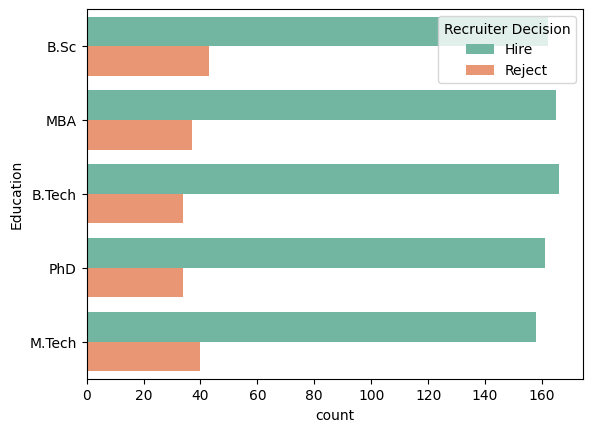

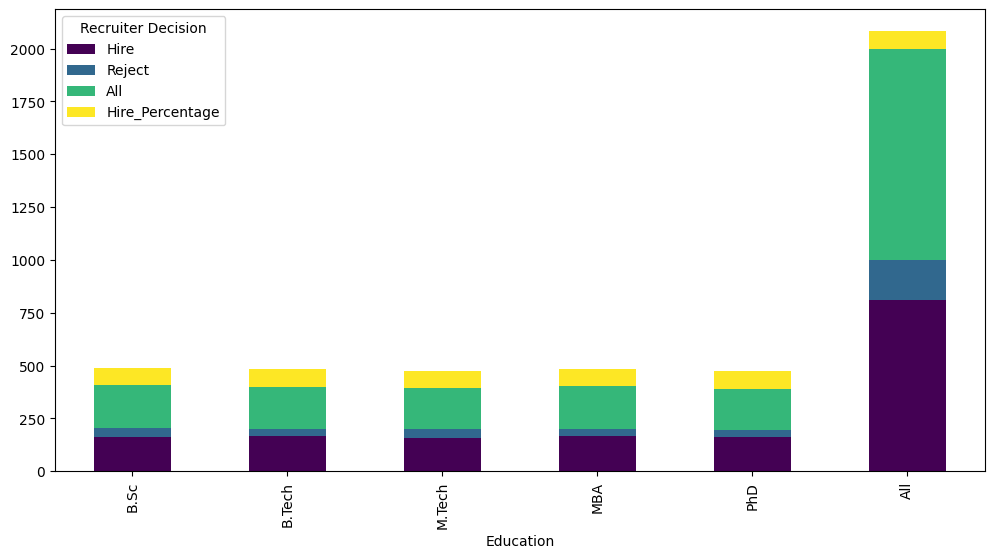

In [25]:
print("*Education Vs Recruiter Decision*")
print(" ")
EducationVsRecDecision = pd.crosstab(df['Education'], df['Recruiter Decision'], margins=True)
EducationVsRecDecision['Hire_Percentage'] = (EducationVsRecDecision['Hire'] / EducationVsRecDecision['All']) * 100
print(EducationVsRecDecision)
print(" ")
print(" ")
sns.countplot(y='Education', hue='Recruiter Decision', data=df, palette='Set2')
EducationVsRecDecision.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')


*Experience (Years) Vs Recruiter Decision*
 
Recruiter Decision  Hire  Reject   All  Hire_Percentage
Experience (Years)                                     
0                     21      68    89        23.595506
1                     47      55   102        46.078431
2                     46      36    82        56.097561
3                     83      23   106        78.301887
4                     74       6    80        92.500000
5                     95       0    95       100.000000
6                     99       0    99       100.000000
7                     93       0    93       100.000000
8                     91       0    91       100.000000
9                     86       0    86       100.000000
10                    77       0    77       100.000000
All                  812     188  1000        81.200000
 
 


<Axes: xlabel='Experience (Years)'>

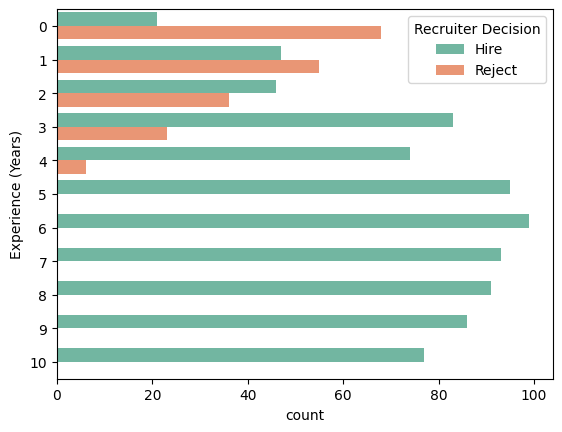

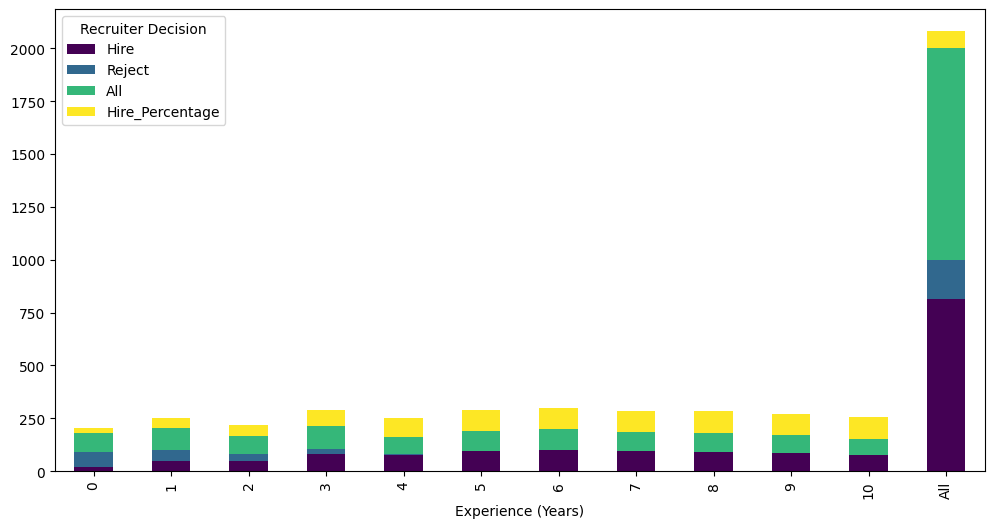

In [26]:
print("*Experience (Years) Vs Recruiter Decision*")
print(" ")
ExperienceVsRecDecision = pd.crosstab(df['Experience (Years)'], df['Recruiter Decision'], margins=True)
ExperienceVsRecDecision['Hire_Percentage'] = (ExperienceVsRecDecision['Hire'] / ExperienceVsRecDecision['All']) * 100
print(ExperienceVsRecDecision)
print(" ")
print(" ")
sns.countplot(y='Experience (Years)', hue='Recruiter Decision', data=df, palette='Set2')
ExperienceVsRecDecision.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')


*Projects Count Vs Recruiter Decision*
 
Recruiter Decision  Hire  Reject   All  Hire_Percentage
Projects Count                                         
0                     68      27    95        71.578947
1                     48      34    82        58.536585
2                     63      31    94        67.021277
3                     51      26    77        66.233766
4                     68      27    95        71.578947
5                     75      14    89        84.269663
6                     62      15    77        80.519481
7                     83       8    91        91.208791
8                     95       5   100        95.000000
9                     91       1    92        98.913043
10                   108       0   108       100.000000
All                  812     188  1000        81.200000
 
 


<Axes: xlabel='Projects Count'>

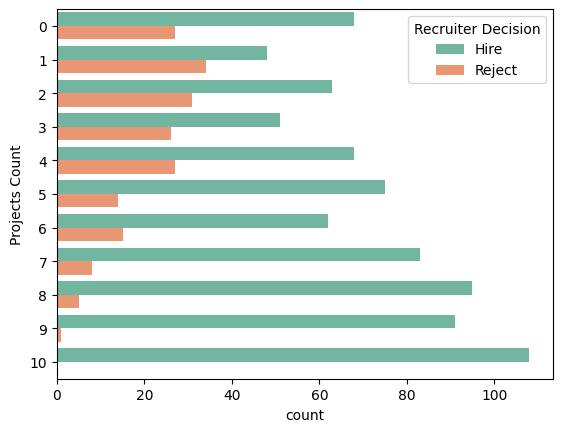

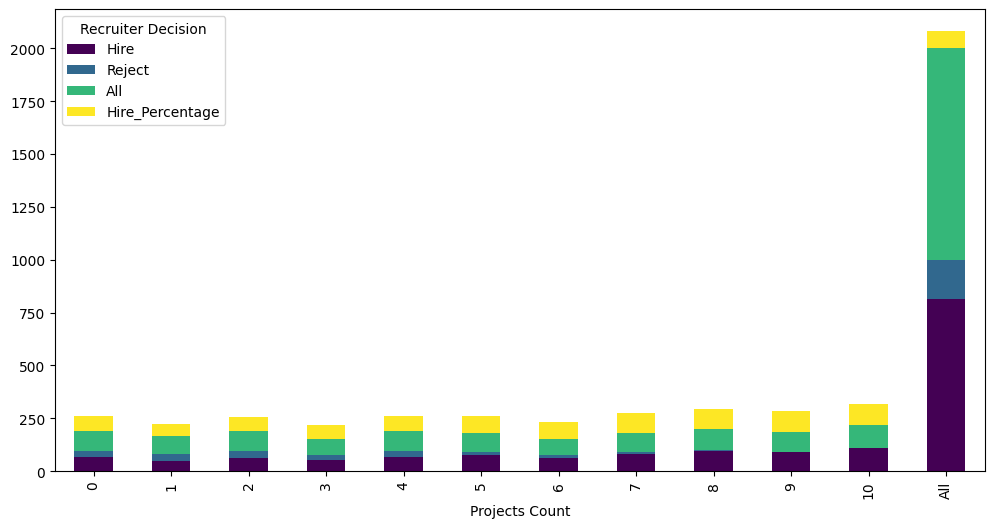

In [27]:
print("*Projects Count Vs Recruiter Decision*")
print(" ")
ProjectsCountVsRecDecision = pd.crosstab(df['Projects Count'], df['Recruiter Decision'], margins=True)
ProjectsCountVsRecDecision['Hire_Percentage'] = (ProjectsCountVsRecDecision['Hire'] / ProjectsCountVsRecDecision['All']) * 100
print(ProjectsCountVsRecDecision)
print(" ")
print(" ")
sns.countplot(y='Projects Count', hue='Recruiter Decision', data=df, palette='Set2')
ProjectsCountVsRecDecision.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')


*AI Score (0-100) Count Vs Recruiter Decision*
 
Recruiter Decision  Hire  Reject   All  Hire_Percentage
AI Score (0-100)                                       
15                     0       2     2              0.0
20                     0       4     4              0.0
25                     0       4     4              0.0
30                     0      11    11              0.0
35                     0      18    18              0.0
40                     0      15    15              0.0
45                     0      30    30              0.0
50                     0      33    33              0.0
55                     0      27    27              0.0
60                     0      44    44              0.0
65                    39       0    39            100.0
70                    53       0    53            100.0
75                    36       0    36            100.0
80                    47       0    47            100.0
85                    46       0    46            100.0

<Axes: xlabel='AI Score (0-100)'>

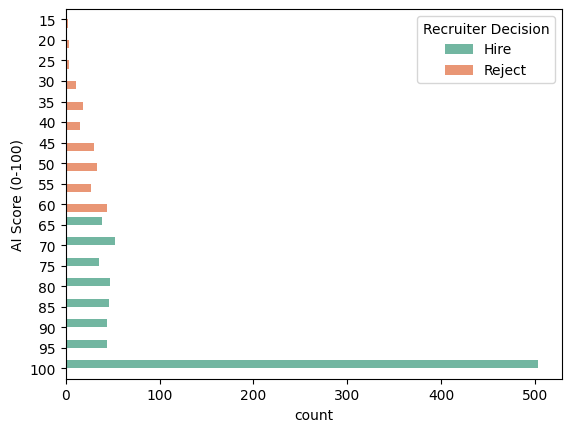

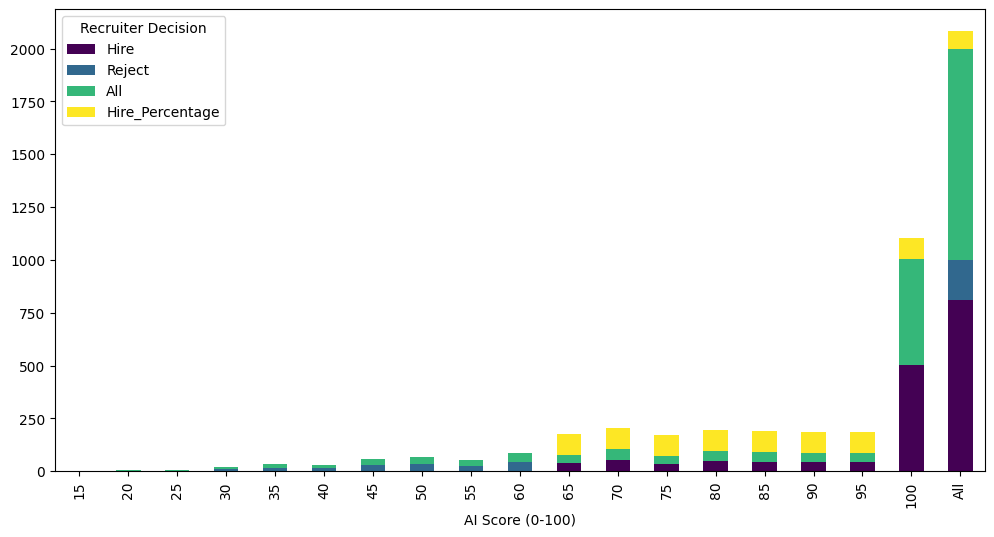

In [28]:
print("*AI Score (0-100) Count Vs Recruiter Decision*")
print(" ")
AIScoreVsRecDecision = pd.crosstab(df['AI Score (0-100)'], df['Recruiter Decision'], margins=True)
AIScoreVsRecDecision['Hire_Percentage'] = (AIScoreVsRecDecision['Hire'] / AIScoreVsRecDecision['All']) * 100
print(AIScoreVsRecDecision)
print(" ")
print(" ")
sns.countplot(y='AI Score (0-100)', hue='Recruiter Decision', data=df, palette='Set2')
AIScoreVsRecDecision.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')


In [30]:
df.head()

,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100),Skills_List,NumOfSkill
0,Ashley Ali,"TensorFlow, NLP, Pytorch",10,B.Sc,No Certification,AI Researcher,Hire,104895,8,100,"[TensorFlow, NLP, Pytorch]",3
1,Wesley Roman,"Deep Learning, Machine Learning, Python, SQL",10,MBA,Google ML,Data Scientist,Hire,113002,1,100,"[Deep Learning, Machine Learning, Python, SQL]",4
2,Corey Sanchez,"Ethical Hacking, Cybersecurity, Linux",1,MBA,Deep Learning Specialization,Cybersecurity Analyst,Hire,71766,7,70,"[Ethical Hacking, Cybersecurity, Linux]",3
3,Elizabeth Carney,"Python, Pytorch, TensorFlow",7,B.Tech,AWS Certified,AI Researcher,Hire,46848,0,95,"[Python, Pytorch, TensorFlow]",3
4,Julie Hill,"SQL, React, Java",4,PhD,No Certification,Software Engineer,Hire,87441,9,100,"[SQL, React, Java]",3


In [65]:
#Ml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, r2_score, classification_report
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR


In [33]:
# Encode categorical variables
le = LabelEncoder()
df['Recruiter Decision'] = le.fit_transform(df['Recruiter Decision'])  # 1: Hire, 0: Reject
df['Job Role'] = le.fit_transform(df['Job Role'])

In [34]:
# Logistic Regression - (Predicting Recruiter Decision)

In [35]:
X_class = df[['Experience (Years)', 'NumOfSkill', 'Job Role', 'AI Score (0-100)']]
y_class = df['Recruiter Decision']

In [36]:
# Train-test split for classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train_cls, y_train_cls)

LogisticRegression()

In [44]:
y_pred_cls = log_reg.predict(X_test_cls)

print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      1.00      1.00        64

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [86]:
print("Accuracy:", accuracy_score(y_test_cls, y_pred_cls)*100)

Accuracy: 100.0


In [61]:
# Random Forest Classifier Model - (Predicting Recruiter Decision) 

In [67]:
rf_cls = RandomForestClassifier(random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)

RandomForestClassifier(random_state=42)

In [69]:
y_pred_rf = rf_cls.predict(X_test_cls)

In [84]:
print("\nRandom Forest Classifier - Classification Report:")
print(classification_report(y_test_cls, y_pred_rf))
print("Accuracy:", accuracy_score(y_test_cls, y_pred_rf)*100)


Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      1.00      1.00        64

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 100.0


In [76]:
# Support Vector Classifier (SVC) Model
svc = SVC(probability=True, random_state=42)
svc.fit(X_train_cls, y_train_cls)

SVC(probability=True, random_state=42)

In [78]:
y_pred_svc = svc.predict(X_test_cls)

In [82]:
print("\nSupport Vector Classifier - Classification Report:")
print(classification_report(y_test_cls, y_pred_svc))
print("Accuracy:", accuracy_score(y_test_cls, y_pred_svc)*100)



Support Vector Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       236
           1       1.00      1.00      1.00        64

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

Accuracy: 100.0


In [98]:
# Linear Regression - Predicting Salary


In [100]:
X_reg = df[['Experience (Years)', 'NumOfSkill', 'Job Role', 'AI Score (0-100)']]
y_reg = df['Salary Expectation ($)']

In [102]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)

In [104]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)


LinearRegression()

In [106]:
y_pred_reg = lin_reg.predict(X_test_reg)

In [108]:
print("\nLinear Regression - Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_reg, y_pred_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_reg))



Linear Regression - Evaluation:
Mean Squared Error (MSE): 565811196.4996339
R² Score: -0.012697743437259934


In [110]:
# Random Forest Regressor Model
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [111]:
y_pred_rf_reg = rf_reg.predict(X_test_reg)

In [112]:
print("\nRandom Forest Regressor - Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_reg, y_pred_rf_reg))
print("R² Score:", r2_score(y_test_reg, y_pred_rf_reg))



Random Forest Regressor - Evaluation:
Mean Squared Error (MSE): 749809402.9056
R² Score: -0.34202061576035225


In [116]:
# Support Vector Regressor (SVR) Model
svr = SVR()
svr.fit(X_train_reg, y_train_reg)


SVR()

In [120]:
y_pred_svr = svr.predict(X_test_reg)

In [122]:
print("\nSupport Vector Regressor - Evaluation:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test_reg, y_pred_svr))
print("R² Score:", r2_score(y_test_reg, y_pred_svr))



Support Vector Regressor - Evaluation:
Mean Squared Error (MSE): 559322993.2370658
R² Score: -0.0010850555943651141


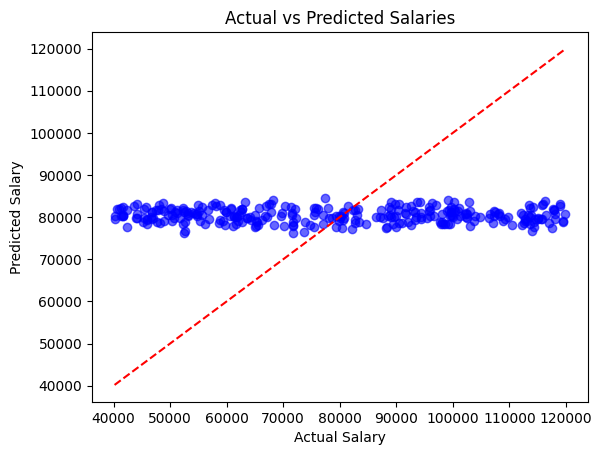

In [138]:
# Plot actual vs predicted salaries
plt.scatter(y_test_reg, y_pred_reg, color='blue', alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], '--', color='red')
plt.title("Actual vs Predicted Salaries")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.show()
